# Data Tidying

In [16]:
# setup
options(warn = -1)
options(repr.plot.width = 8, repr.plot.height = 7)

In [2]:
# libraries
suppressMessages(library(tidyverse))

In [6]:
# view the data (first 3 rows)
table1 %>% head(3)
table2 %>% head(3)
table3 %>% head(3)

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362


country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666


country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362


Let's apply some processes to tidy up the data.

In [5]:
# add rate column
# rate = cases / population * 100,00
table1 %>%
    mutate(rate = cases / population * 10000) %>%
    head()

country,year,cases,population,rate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [10]:
# find total cases per year for table 1
table1 %>%
    group_by(year) %>%
    summarize(total = sum(cases))

year,total
<dbl>,<dbl>
1999,250740
2000,296920


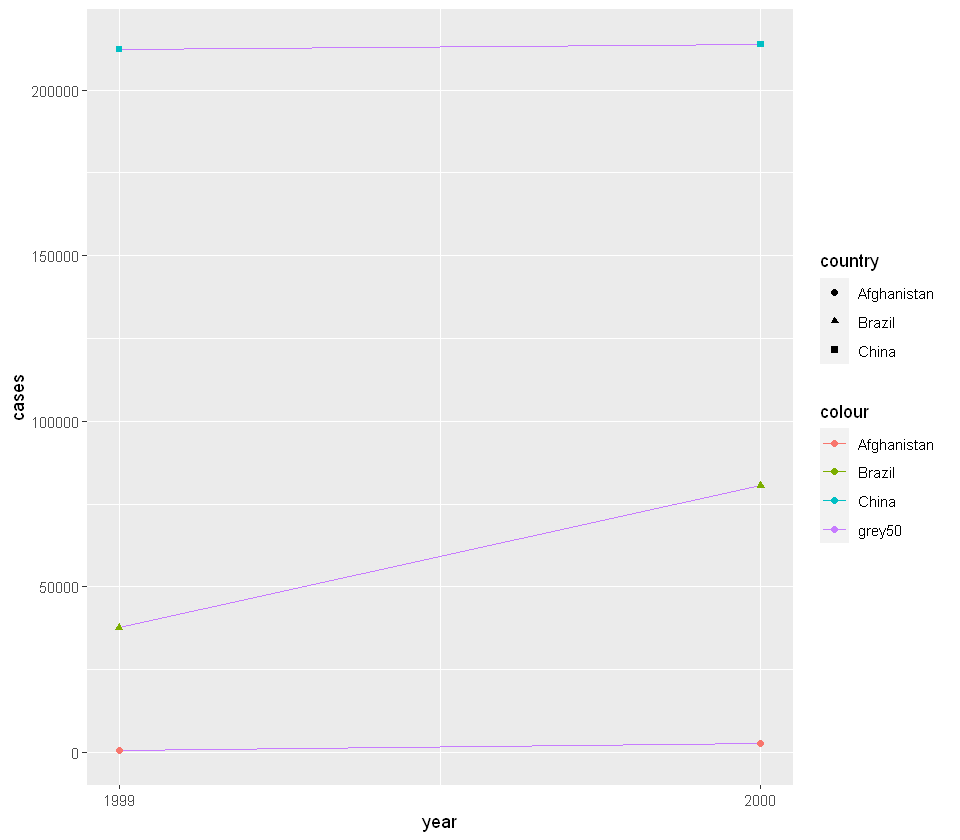

In [17]:
# let's visualize on a plot 
# we will break the x-axis at 1999 and 2000
ggplot(table1, aes(x = year, y = cases)) +
    geom_line(aes(group = country, color = "grey50")) +
    geom_point(aes(color = country, shape = country)) +
    scale_x_continuous(breaks = c(1999, 2000)) 

## Lengthening Data

We will be using the `billboard` dataset that contains the Billboard rank of songs in the year 2000

In [18]:
# see the billboards data
billboard %>% head(3)

artist,track,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,⋯,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,87,82,72,77,87,94,99,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2Ge+her,The Hardest Part Of ...,2000-09-02,91,87,92,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Kryptonite,2000-04-08,81,70,68,67,66,57,54,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
# make the week columns into a single column
billboard %>%
    pivot_longer(
        cols = starts_with("wk"),
        names_to = "week",
        values_to = "rank"
    ) %>% head(10)

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<chr>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk6,94
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk7,99
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk8,NA
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk9,NA


We can see that the rank contains `NA`. This happens since the song is only top 100 for 7 weeks, thus the remaining weeks will contain `NA`. Let's get rid of them by changing the `value_drop_na` parameter which by default is set to `false`

In [22]:
# make the week columns into a single column
billboard %>%
    pivot_longer(
        cols = starts_with("wk"),
        names_to = "week",
        values_to = "rank",
        values_drop_na = TRUE
    ) %>% head(10)

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<chr>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk6,94
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk7,99
2Ge+her,The Hardest Part Of ...,2000-09-02,wk1,91
2Ge+her,The Hardest Part Of ...,2000-09-02,wk2,87


To make further analysis easier, let's change the week from character strings to number

In [23]:
billboard_longer = billboard %>%
    pivot_longer(
        cols = starts_with("wk"),
        names_to = "week",
        values_to = "rank",
        values_drop_na = TRUE
    ) %>%  mutate(week = parse_number(week))
head(billboard_longer)

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<dbl>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,6,94


Let's make a graph to visualize how these song rank over time

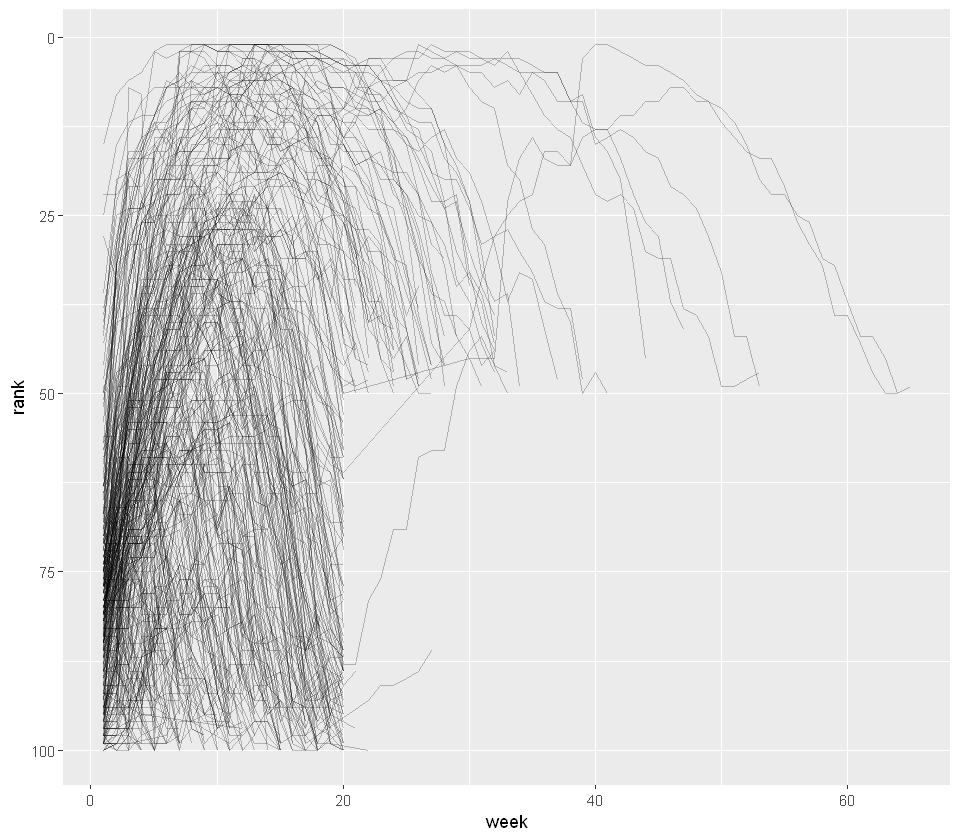

In [24]:
billboard_longer %>%
    ggplot(aes(x = week, y = rank, group = track)) +
    geom_line(alpha = 1/4) +
    scale_y_reverse()

## Many variables in column names

We can see the below dataset has many columns

In [25]:
head(who2)

country,year,sp_m_014,sp_m_1524,sp_m_2534,sp_m_3544,sp_m_4554,sp_m_5564,sp_m_65,sp_f_014,⋯,rel_m_4554,rel_m_5564,rel_m_65,rel_f_014,rel_f_1524,rel_f_2534,rel_f_3544,rel_f_4554,rel_f_5564,rel_f_65
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1980,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1981,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1982,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1983,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1984,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1985,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We can see the above naming is made up of three parts
- The first part describe the diagnosis method
- The second is the gender
- The third piece is the age range

We can use `pivot_longer` to make them into 3 columns based on the above inference

In [26]:
# let's reogrnaize the data
who2 %>%
    pivot_longer(
        cols = !(country:year),
        names_to = c("diagnosis", "gender", "age"),
        names_sep = "_",
        values_to = "count"
    ) %>% head(5)

country,year,diagnosis,gender,age,count
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,1980,sp,m,014,NA
Afghanistan,1980,sp,m,1524,NA
Afghanistan,1980,sp,m,2534,NA
Afghanistan,1980,sp,m,3544,NA
Afghanistan,1980,sp,m,4554,NA


What if we have columns names with a mix of variable values and variable names

In [27]:
head(household)

family,dob_child1,dob_child2,name_child1,name_child2
<int>,<date>,<date>,<chr>,<chr>
1,1998-11-26,2000-01-29,Susan,Jose
2,1996-06-22,NA,Mark,NA
3,2002-07-11,2004-04-05,Sam,Seth
4,2004-10-10,2009-08-27,Craig,Khai
5,2000-12-05,2005-02-28,Parker,Gracie


In [31]:
household %>%
    pivot_longer(
        cols = !family,
        names_to = c(".value", "child"),
        names_sep = "_",
        values_drop_na = TRUE
    ) %>% head(5)

family,child,dob,name
<int>,<chr>,<date>,<chr>
1,child1,1998-11-26,Susan
1,child2,2000-01-29,Jose
2,child1,1996-06-22,Mark
3,child1,2002-07-11,Sam
3,child2,2004-04-05,Seth


## Widening Data

In [32]:
head(cms_patient_experience)

org_pac_id,org_nm,measure_cd,measure_title,prf_rate
<chr>,<chr>,<chr>,<chr>,<dbl>
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information",63
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_2,CAHPS for MIPS SSM: How Well Providers Communicate,87
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_3,CAHPS for MIPS SSM: Patient's Rating of Provider,86
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_5,CAHPS for MIPS SSM: Health Promotion and Education,57
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_8,CAHPS for MIPS SSM: Courteous and Helpful Office Staff,85
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_12,CAHPS for MIPS SSM: Stewardship of Patient Resources,24


In [33]:
cms_patient_experience %>%
    distinct(measure_cd, measure_title) %>%
    head()

measure_cd,measure_title
<chr>,<chr>
CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information"
CAHPS_GRP_2,CAHPS for MIPS SSM: How Well Providers Communicate
CAHPS_GRP_3,CAHPS for MIPS SSM: Patient's Rating of Provider
CAHPS_GRP_5,CAHPS for MIPS SSM: Health Promotion and Education
CAHPS_GRP_8,CAHPS for MIPS SSM: Courteous and Helpful Office Staff
CAHPS_GRP_12,CAHPS for MIPS SSM: Stewardship of Patient Resources


In [35]:
cms_patient_experience %>%
    pivot_wider(
        names_from = measure_cd,
        values_from = prf_rate
    ) %>% head()

org_pac_id,org_nm,measure_title,CAHPS_GRP_1,CAHPS_GRP_2,CAHPS_GRP_3,CAHPS_GRP_5,CAHPS_GRP_8,CAHPS_GRP_12
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0446157747,USC CARE MEDICAL GROUP INC,"CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information",63,NA,NA,NA,NA,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: How Well Providers Communicate,NA,87,NA,NA,NA,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: Patient's Rating of Provider,NA,NA,86,NA,NA,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: Health Promotion and Education,NA,NA,NA,57,NA,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: Courteous and Helpful Office Staff,NA,NA,NA,NA,85,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: Stewardship of Patient Resources,NA,NA,NA,NA,NA,24


In [37]:
cms_patient_experience %>%
    pivot_wider(
        id_cols = starts_with("org"),
        names_from = measure_cd,
        values_from = prf_rate
    ) %>% head()

org_pac_id,org_nm,CAHPS_GRP_1,CAHPS_GRP_2,CAHPS_GRP_3,CAHPS_GRP_5,CAHPS_GRP_8,CAHPS_GRP_12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0446157747,USC CARE MEDICAL GROUP INC,63,87,86,57,85,24
0446162697,ASSOCIATION OF UNIVERSITY PHYSICIANS,59,85,83,63,88,22
0547164295,BEAVER MEDICAL GROUP PC,49,NA,75,44,73,12
0749333730,CAPE PHYSICIANS ASSOCIATES PA,67,84,85,65,82,24
0840104360,ALLIANCE PHYSICIANS INC,66,87,87,64,87,28
0840109864,REX HOSPITAL INC,73,87,84,67,91,30
